# Scraping Jobs.ch

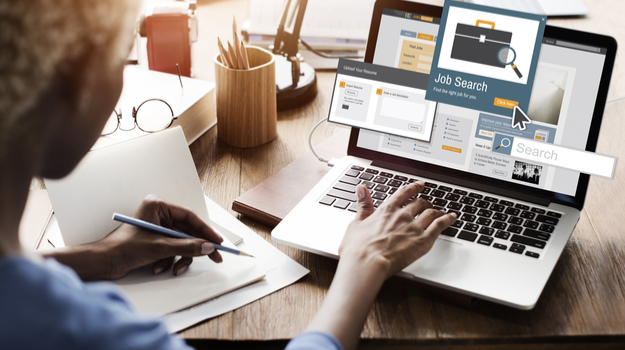    

As a job seeker, one has to search through job portals to find most relevant jobs related to your profile. In this exercise, your goal is to find all jobs related to keywords: “Data Scientist”, “Data Analyst”, “Python Developer”, “Data Engineer”, “Data Manager”, “Data Architect”, “Big Data Analyst” and “Data Python” on jobs.ch.

1.1. Download all necessary information (including job title, date, company name, location…) for all webpages.

In [1]:
# import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
keywords = ["Data Scientist", "Data Analyst", "Python Developer", "Data Engineer", "Data Manager", "Data Architect", "Big Data Analyst", "Data Python"]

#### 1. For a single page under 'data scientist'

In [3]:
# parsing webpage content
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
}

job_tit = keywords[0]
job_tit_html = job_tit.lower().replace(" ", "%20")    # space for html reader
page_no = str(1)
job_tit_html, page_no

('data%20scientist', '1')

In [4]:
url = f"https://www.jobs.ch/en/vacancies/?page={page_no}&term={job_tit_html}"
page = requests.get(url, headers=headers, timeout=2)
print(page.status_code)
page.content[:5000]

200


b'<!doctype html>\n<html  lang="en">\n  <head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n\n    <!-- No cache for index.html -->\n    \n    <meta http-equiv="Pragma" content="no-cache" />\n    <meta http-equiv="cache-control" content="no-cache, must-revalidate" />\n    \n\n    <title>199 Data scientist jobs - jobs.ch</title>\n\n    <!-- Preconnects : only first party origin and used everywhere! -->\n\n    \n\n    \n    <link rel="preconnect" href="//c.jobs.ch" />\n    \n\n    <!-- Fonts -->\n    \n      <link as="font" type="font/woff2" href="/public/fonts/03d2aa5e66b427f22f38.woff2" fetchpriority="high" crossorigin />\n    \n      <link as="font" type="font/woff2" href="/public/fonts/1f8b60e7a2f4cbdb085a.woff2" fetchpriority="high" crossorigin />\n    \n      <link as="font" type="font/woff2" href="/public/fonts/fd84e3051ac1afa72e7a.woff2" fetchpriority="high" crossorigin />\n    \n\n    \n      <!-- Synchronous JS -->\n 

The webpage iis successfully accessed.

In [5]:
soup = BeautifulSoup(page.content, "html.parser")
# the soup is all the ingredients from the html

# finding useful things from the soup
job_ads = soup.find_all('a', {'data-cy' : 'job-link'})   
len(job_ads)

21

In [6]:
# check attribuates 
soup.find('a', {'data-cy' : 'job-link'}).attrs  

{'data-cy': 'job-link',
 'id': 'vacancy-link-aeb1d50a-523d-4413-bc88-b271df9117c9',
 'tabindex': '0',
 'title': '(Senior) Data Analyst Marketing (m/f/d)',
 'class': ['cursor_pointer',
  'trs-dur_d125',
  'trs-prop_color',
  'trs-tmf_ease-out',
  'td_none',
  'c_colorPalette.base',
  'hover:c_colorPalette.hover',
  'visited:c_colorPalette.visited',
  'color-palette_link.brand',
  'd_block',
  'wb_break-word',
  'h_100%',
  'group'],
 'href': '/en/vacancies/detail/aeb1d50a-523d-4413-bc88-b271df9117c9/'}

In [7]:
job_ads[0] # this is the group elements from the first job ads showed on the webpage

<a class="cursor_pointer trs-dur_d125 trs-prop_color trs-tmf_ease-out td_none c_colorPalette.base hover:c_colorPalette.hover visited:c_colorPalette.visited color-palette_link.brand d_block wb_break-word h_100% group" data-cy="job-link" href="/en/vacancies/detail/aeb1d50a-523d-4413-bc88-b271df9117c9/" id="vacancy-link-aeb1d50a-523d-4413-bc88-b271df9117c9" tabindex="0" title="(Senior) Data Analyst Marketing (m/f/d)"><div class="d_flex bg-c_brand.01 bdr_r16 flex-d_column h_100% p_s16 pos_relative" data-cy="vacancy-serp-item-active"><div class="d_flex jc_space-between mb_s12" data-cy="serp-item-aeb1d50a-523d-4413-bc88-b271df9117c9"><p class="mb_s12 lastOfType:mb_s0 textStyle_p2 c_gray.50 max-w_[min-content] white-space_nowrap">Last week</p><button aria-label="Save job" aria-pressed="false" class="color-palette_button.brand pos_absolute right_s4 top_s4 iconButton iconButton--buttonSize_md iconButton--buttonType_blended notranslate" data-cy="bookmark-icon-unchecked" id="vacancy-bookmark-icon

In [8]:
# time/date
job_ads[0].find('p', {'class': 'mb_s12 lastOfType:mb_s0 textStyle_p2 c_gray.50 max-w_[min-content] white-space_nowrap'}).text
# <p class="mb_s12 lastOfType:mb_s0 textStyle_p2 c_gray.50 max-w_[min-content] white-space_nowrap">2 weeks ago</p>

'Last week'

In [9]:
# title
job_ads[0].get('title')

'(Senior) Data Analyst Marketing (m/f/d)'

In [10]:
job_ads[0].find_all('p',{'class' : 'mb_s12 lastOfType:mb_s0 textStyle_p2'})
# loc
# workload
# contract


[<p class="mb_s12 lastOfType:mb_s0 textStyle_p2">Zürich</p>,
 <p class="mb_s12 lastOfType:mb_s0 textStyle_p2">80 – 100%</p>,
 <p class="mb_s12 lastOfType:mb_s0 textStyle_p2">Unlimited employment</p>]

In [11]:
job_ads[0].find_all('p',{'class' : 'mb_s12 lastOfType:mb_s0 textStyle_p2'})[0].text

'Zürich'

In [12]:
# company
job_ads[0].find('p',{'class':'mb_s12 lastOfType:mb_s0 textStyle_p2 c_gray.90'}).find('strong').text
#<p class="mb_s12 lastOfType:mb_s0 textStyle_p2 c_gray.90"><strong>SamanTree Medical (Switzerland) SA</strong></p>


'Digitec Galaxus AG'

In [13]:
for i in range(20):
    print(job_ads[i].find('p',{'class':'mb_s12 lastOfType:mb_s0 textStyle_p2 c_gray.90'}).find('strong').text)

Digitec Galaxus AG
Kernkraftwerk Gösgen-Däniken
SamanTree Medical (Switzerland) SA
machineMD AG
SMG Swiss Marketplace Group
Eraneos Switzerland AG
DV Bern
SwissDRG AG
Office fédéral constructions et logistique OFCL
Consult & Pepper AG
Bundesamt für Bauten und Logistik BBL
Ville de Nyon
Schweizer Armee - Kommando Cyber Kdo Cy
BKW Energie AG
Manpower SA
Xovis AG
Xovis AG
AXA
ITech Consult AG
Schneider Electric (Schweiz) AG


In [14]:
# hyperlink
job_ads[0].get('href')  # need to add 'https://www.jobs.ch'

'/en/vacancies/detail/aeb1d50a-523d-4413-bc88-b271df9117c9/'

In [15]:
# create dataframe
df = pd.DataFrame(columns=['date', 'title', 'location', 'workload', 'contract', 'company', 'link'])

In [18]:
for job in job_ads:
    try:
        date = job.find('p', 
                        {'class': 'mb_s12 lastOfType:mb_s0 textStyle_p2 c_gray.50 max-w_[min-content] white-space_nowrap'}).text
    except AttributeError:
        date = None

    try:
        title = job.get('title')
    except AttributeError:
        title = None
    
    try: 
        location = job.find_all('p',{'class' : 'mb_s12 lastOfType:mb_s0 textStyle_p2'})[0].text
    except AttributeError:
        location = None

    try: 
        workload = job.find_all('p',{'class' : 'mb_s12 lastOfType:mb_s0 textStyle_p2'})[1].text
    except AttributeError:
        workload = None

    try:
        contract = job.find_all('p',{'class' : 'mb_s12 lastOfType:mb_s0 textStyle_p2'})[2].text
    except AttributeError:
        contract = None

    try:
        company = job.find('p',{'class':'mb_s12 lastOfType:mb_s0 textStyle_p2 c_gray.90'}).find('strong').text
    except AttributeError:
        company = None

    try:
        link = job.get('href')
    except AttributeError:
        link = None
    
    job_dict = {
        "date": date,
        "title": title,
        "location": location,
        "workload": workload,
        "contract": contract,
        "company": company,
        "link": 'https://www.jobs.ch' + link
    }

    df = pd.concat(
        [df, pd.DataFrame([job_dict])],
        ignore_index=True  # keep the indices
    )
    

In [19]:
df

,date,title,location,workload,contract,company,link
0,Last week,(Senior) Data Analyst Marketing (m/f/d),Zürich,80 – 100%,Unlimited employment,Digitec Galaxus AG,https://www.jobs.ch/en/vacancies/detail/aeb1d5...
1,4 days ago,Spezialist Ereignisanalyse und Erfahrungsauswe...,Kernkraftwerk Gösgen-Däniken AG,100%,Unlimited employment,Kernkraftwerk Gösgen-Däniken,https://www.jobs.ch/en/vacancies/detail/04c4d2...
2,2 weeks ago,Data Scientist,Lausanne,80 – 100%,Unlimited employment,SamanTree Medical (Switzerland) SA,https://www.jobs.ch/en/vacancies/detail/9de714...
3,Last week,Principal Machine Learning Engineer,Bern,100%,Unlimited employment,machineMD AG,https://www.jobs.ch/en/vacancies/detail/d59c31...
4,Last week,Head of Data Engineering (f/m/d) | 80-100% | H...,Zürich,80 – 100%,Unlimited employment,SMG Swiss Marketplace Group,https://www.jobs.ch/en/vacancies/detail/ef10c7...
5,Last week,(Senior) Data Science & Data Analytics Consult...,"Zürich, Lausanne, Bern",60 – 100%,Unlimited employment,Eraneos Switzerland AG,https://www.jobs.ch/en/vacancies/detail/5db6db...
6,2 days ago,ML / Data Science Specialist (80-100%),Bern,80 – 100%,Unlimited employment,DV Bern,https://www.jobs.ch/en/vacancies/detail/2bd5fe...
7,6 days ago,Statistische*r Datanalyst*in (60% bis 100%),Bern,60 – 100%,Unlimited employment,SwissDRG AG,https://www.jobs.ch/en/vacancies/detail/97aafa...
8,3 weeks ago,Analyste de données pour le controlling des ac...,Berne et travail à domicile,80 – 100%,Unlimited employment,Office fédéral constructions et logistique OFCL,https://www.jobs.ch/en/vacancies/detail/53fa84...
9,3 days ago,Head of AI & Data Science (a),Neuchâtel (Hybrid),100%,Unlimited employment,Consult & Pepper AG,https://www.jobs.ch/en/vacancies/detail/3e31c2...


#### 2. For all pages under 'data scientist'

In [ ]:
# fire up stove
job_tit = keywords[0]   # data scientist
job_tit_html = job_tit.lower().replace(" ", "%20")    # space for html reader

url = f"https://www.jobs.ch/en/vacancies/?page={1}&term={job_tit_html}"
page = requests.get(url, headers=headers, timeout=2)    
soup = BeautifulSoup(page.content, "html.parser")       

In [ ]:
# [test] finding max. page num
soup.find_all('span', {'tabindex': "-1"})[-2].text.split()[1]

In [ ]:
df = pd.DataFrame(columns=['date', 'title', 'location', 'workload', 'contract', 'company', 'link'])

In [ ]:
import time

max_pages = int(soup.find_all('span', {'title': "Page 11"})[-1].text.split()[1])

for p in range(1, max_pages+1): 
    page_no = str(p)
    url = f"https://www.jobs.ch/en/vacancies/?page={page_no}&term={job_tit_html}"
    time.sleep(2)   # put some break time
    
    page = requests.get(url, headers=headers, timeout=2)    # order soup
    soup = BeautifulSoup(page.content, "html.parser")       # cooking soup
    job_ads = soup.find_all('a', {'data-cy' : 'job-link'})  # scoping soup

    for job in job_ads:
        try:
            date = job.find('p', 
                            {'class': 'mb_s12 lastOfType:mb_s0 textStyle_p2 c_gray.50 max-w_[min-content] white-space_nowrap'}).text
        except AttributeError:
            date = None

        try:
            title = job.get('title')
        except AttributeError:
            title = None
        
        try: 
            location = job.find_all('p',{'class' : 'mb_s12 lastOfType:mb_s0 textStyle_p2'})[0].text
        except AttributeError:
            location = None

        try: 
            workload = job.find_all('p',{'class' : 'mb_s12 lastOfType:mb_s0 textStyle_p2'})[1].text
        except (AttributeError, IndexError):
            workload = None

        try:
            contract = job.find_all('p',{'class' : 'mb_s12 lastOfType:mb_s0 textStyle_p2'})[2].text
        except (AttributeError, IndexError):
            contract = None

        try:
            company = job.find('p',{'class':'mb_s12 lastOfType:mb_s0 textStyle_p2 c_gray.90'}).find('strong').text
        except AttributeError:
            company = None

        try:
            link = job.get('href')
        except AttributeError:
            link = None
        
        job_dict = {
            "date": date,
            "title": title,
            "location": location,
            "workload": workload,
            "contract": contract,
            "company": company,
            "link": 'https://www.jobs.ch' + link
        }

        df = pd.concat(
            [df, pd.DataFrame([job_dict])],
            ignore_index=False  # keep the indices
        )

In [20]:
df

,date,title,location,workload,contract,company,link
0,Last week,(Senior) Data Analyst Marketing (m/f/d),Zürich,80 – 100%,Unlimited employment,Digitec Galaxus AG,https://www.jobs.ch/en/vacancies/detail/aeb1d5...
1,4 days ago,Spezialist Ereignisanalyse und Erfahrungsauswe...,Kernkraftwerk Gösgen-Däniken AG,100%,Unlimited employment,Kernkraftwerk Gösgen-Däniken,https://www.jobs.ch/en/vacancies/detail/04c4d2...
2,2 weeks ago,Data Scientist,Lausanne,80 – 100%,Unlimited employment,SamanTree Medical (Switzerland) SA,https://www.jobs.ch/en/vacancies/detail/9de714...
3,Last week,Principal Machine Learning Engineer,Bern,100%,Unlimited employment,machineMD AG,https://www.jobs.ch/en/vacancies/detail/d59c31...
4,Last week,Head of Data Engineering (f/m/d) | 80-100% | H...,Zürich,80 – 100%,Unlimited employment,SMG Swiss Marketplace Group,https://www.jobs.ch/en/vacancies/detail/ef10c7...
5,Last week,(Senior) Data Science & Data Analytics Consult...,"Zürich, Lausanne, Bern",60 – 100%,Unlimited employment,Eraneos Switzerland AG,https://www.jobs.ch/en/vacancies/detail/5db6db...
6,2 days ago,ML / Data Science Specialist (80-100%),Bern,80 – 100%,Unlimited employment,DV Bern,https://www.jobs.ch/en/vacancies/detail/2bd5fe...
7,6 days ago,Statistische*r Datanalyst*in (60% bis 100%),Bern,60 – 100%,Unlimited employment,SwissDRG AG,https://www.jobs.ch/en/vacancies/detail/97aafa...
8,3 weeks ago,Analyste de données pour le controlling des ac...,Berne et travail à domicile,80 – 100%,Unlimited employment,Office fédéral constructions et logistique OFCL,https://www.jobs.ch/en/vacancies/detail/53fa84...
9,3 days ago,Head of AI & Data Science (a),Neuchâtel (Hybrid),100%,Unlimited employment,Consult & Pepper AG,https://www.jobs.ch/en/vacancies/detail/3e31c2...


#### 3. For all pages under a series of categories

In [21]:
# job_tit = keywords[1]   # data scientist
# job_tit_html = job_tit.lower().replace(" ", "%20")    # space for html reader

# url = f"https://www.jobs.ch/en/vacancies/?page={1}&term={job_tit_html}"
# page = requests.get(url, headers=headers, timeout=2)    
# soup = BeautifulSoup(page.content, "html.parser")

# max_pages = int(soup.find_all('span', {'tabindex': "-1"})[-2].text.split()[1])
# max_pages

In [22]:
# import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

keywords = ["Data Scientist", "Data Analyst", "Python Developer", "Data Engineer", "Data Manager", "Data Architect", "Big Data Analyst", "Data Python"]

In [23]:
for k in keywords:
    print(k)

Data Scientist
Data Analyst
Python Developer
Data Engineer
Data Manager
Data Architect
Big Data Analyst
Data Python


In [24]:
df = pd.DataFrame(columns=['position', 'date', 'title', 'location', 'workload', 'contract', 'company', 'link'])

In [25]:
job_tit = keywords[1]   # data scientist
job_tit_html = job_tit.lower().replace(" ", "%20")    # space for html reader

# parsing webpage content
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
}
url = f"https://www.jobs.ch/en/vacancies/?page={1}&term={job_tit_html}"
page = requests.get(url, headers=headers, timeout=2)    
soup = BeautifulSoup(page.content, "html.parser")


In [26]:
for k in keywords:
    print(k)
    # fire up stove
    job_tit = k   # data scientist
    job_tit_html = job_tit.lower().replace(" ", "%20")    # space for html reader
    
    # parsing webpage content
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
    }
    url = f"https://www.jobs.ch/en/vacancies/?page={1}&term={job_tit_html}"
    page = requests.get(url, headers=headers, timeout=2)    
    soup = BeautifulSoup(page.content, "html.parser")

    if len(soup.find_all('span', {'tabindex': "-1"})[-2].text.split()) == 2:
        max_pages = int(soup.find_all('span', {'tabindex': "-1"})[-2].text.split()[1])
    else:
        max_pages = int(soup.find_all('span', {'tabindex': "-1"})[-2].text.split()[0])
    print(max_pages)

Data Scientist
10
Data Analyst
10
Python Developer
5
Data Engineer
50
Data Manager
54
Data Architect
6
Big Data Analyst
4
Data Python
18


In [ ]:
import time 

for k in keywords:
    # fire up stove
    job_tit = k   # data scientist
    job_tit_html = job_tit.lower().replace(" ", "%20")    # space for html reader
    
    # parsing webpage content
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
    }
    url = f"https://www.jobs.ch/en/vacancies/?page={1}&term={job_tit_html}"
    page = requests.get(url, headers=headers, timeout=5)    
    soup = BeautifulSoup(page.content, "html.parser")

    if len(soup.find_all('span', {'tabindex': "-1"})[-2].text.split()) == 2:
        max_pages = int(soup.find_all('span', {'tabindex': "-1"})[-2].text.split()[1])
    else:
        max_pages = int(soup.find_all('span', {'tabindex': "-1"})[-2].text.split()[0])

    for p in range(1, max_pages+1): 
        page_no = str(p)
        url = f"https://www.jobs.ch/en/vacancies/?page={page_no}&term={job_tit_html}"
        time.sleep(2)   # put some break time
        
        page = requests.get(url, headers=headers, timeout=2)    # order soup
        soup = BeautifulSoup(page.content, "html.parser")       # cooking soup
        job_ads = soup.find_all('a', {'data-cy' : 'job-link'})  # scoping soup

        for job in job_ads:
            try:
                date = job.find('p', 
                                {'class': 'mb_s12 lastOfType:mb_s0 textStyle_p2 c_gray.50 max-w_[min-content] white-space_nowrap'}).text
            except AttributeError:
                date = None

            try:
                title = job.get('title')
            except AttributeError:
                title = None
            
            try: 
                location = job.find_all('p',{'class' : 'mb_s12 lastOfType:mb_s0 textStyle_p2'})[0].text
            except AttributeError:
                location = None

            try: 
                workload = job.find_all('p',{'class' : 'mb_s12 lastOfType:mb_s0 textStyle_p2'})[1].text
            except (AttributeError, IndexError):
                workload = None

            try:
                contract = job.find_all('p',{'class' : 'mb_s12 lastOfType:mb_s0 textStyle_p2'})[2].text
            except (AttributeError, IndexError):
                contract = None

            try:
                company = job.find('p',{'class':'mb_s12 lastOfType:mb_s0 textStyle_p2 c_gray.90'}).find('strong').text
            except AttributeError:
                company = None

            try:
                link = job.get('href')
            except AttributeError:
                link = None
            
            job_dict = {
                "position": job_tit,
                "date": date,
                "title": title,
                "location": location,
                "workload": workload,
                "contract": contract,
                "company": company,
                "link": 'https://www.jobs.ch' + link
            }

            df = pd.concat(
                [df, pd.DataFrame([job_dict])],
                ignore_index=True  # keep the indices
            )


In [28]:
df

,position,date,title,location,workload,contract,company,link
0,Data Scientist,Last week,(Senior) Data Analyst Marketing (m/f/d),Zürich,80 – 100%,Unlimited employment,Digitec Galaxus AG,https://www.jobs.ch/en/vacancies/detail/aeb1d5...
0,Data Scientist,Last week,Working student in Business Intelligence/ Data...,Gümlingen,40 – 50%,Unlimited employment,Schneider Electric (Schweiz) AG,https://www.jobs.ch/en/vacancies/detail/458511...
0,Data Scientist,2 weeks ago,Data Scientist,Lausanne,80 – 100%,Unlimited employment,SamanTree Medical (Switzerland) SA,https://www.jobs.ch/en/vacancies/detail/9de714...
0,Data Scientist,Last week,Principal Machine Learning Engineer,Bern,100%,Unlimited employment,machineMD AG,https://www.jobs.ch/en/vacancies/detail/d59c31...
0,Data Scientist,Last week,Head of Data Engineering (f/m/d) | 80-100% | H...,Zürich,80 – 100%,Unlimited employment,SMG Swiss Marketplace Group,https://www.jobs.ch/en/vacancies/detail/ef10c7...
...,...,...,...,...,...,...,...,...
0,Data Python,Last year,Quant & Analytics Consultant - Financial Servi...,Zurich,100%,Unlimited employment,Ernst & Young AG,https://www.jobs.ch/en/vacancies/detail/29655a...
0,Data Python,2 weeks ago,Quant Engineer - WMT,Zürich,100%,Unlimited employment,swissQuant Group AG,https://www.jobs.ch/en/vacancies/detail/d33069...
0,Data Python,Last year,Temporal Interference Stimulation in the Brain...,Zürich,100%,Internship,Forschungsstiftung für Informationstechnologie...,https://www.jobs.ch/en/vacancies/detail/95a77a...
0,Data Python,3 quarters ago,(Senior) Infrastructure Automation Consultant,Zürich,80 – 100%,None,at rete ag,https://www.jobs.ch/en/vacancies/detail/e9c60a...


1.2. Using the information obtained, perform a descriptive analysis on this data including questions:

* How many jobs are shared between these categories?

* How much the keywords: “Data Analyst” and “Big Data Analyst” overlap?

* Are there some companies doing more hires than average?

* How many jobs are there in different Kantons?

* Is “machine learning” keyword more often in data scientist or data analyst jobs?

* What is the distribution of most common keywords between and across categories?

### Job shares among all positions

position
Data Manager        1093
Data Engineer       1003
Data Python          350
Data Scientist       200
Data Analyst         196
Data Architect       111
Python Developer      81
Big Data Analyst      63
Name: count, dtype: int64

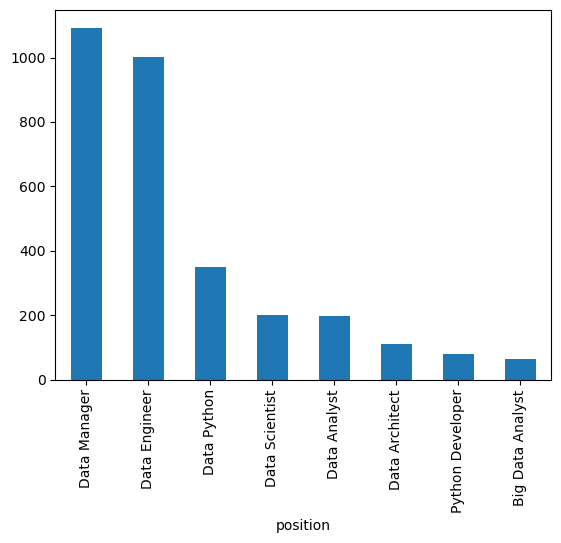

In [29]:
df['position'].value_counts().plot(kind='bar')
df['position'].value_counts()

### Overlapping posts between “Data Analyst” and “Big Data Analyst” 

In [89]:
data_analyst = df[df['position'] == 'Data Analyst']
big_data_analyst = df[df['position'] == 'Big Data Analyst']
data_analyst.info(), big_data_analyst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 0
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   position  196 non-null    object
 1   date      196 non-null    object
 2   title     196 non-null    object
 3   location  196 non-null    object
 4   workload  196 non-null    object
 5   contract  152 non-null    object
 6   company   196 non-null    object
 7   link      196 non-null    object
dtypes: object(8)
memory usage: 13.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 0 to 0
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   position  63 non-null     object
 1   date      63 non-null     object
 2   title     63 non-null     object
 3   location  63 non-null     object
 4   workload  63 non-null     object
 5   contract  52 non-null     object
 6   company   63 non-null     object
 7   link      63 non-null     object
dtypes

(None, None)

In [90]:
big_data_analyst

,position,date,title,location,workload,contract,company,link
0,Big Data Analyst,Last week,(Senior) Data Analyst Marketing (m/f/d),Zürich,80 – 100%,Unlimited employment,Digitec Galaxus AG,https://www.jobs.ch/en/vacancies/detail/aeb1d5...
0,Big Data Analyst,Last week,Working student in Business Intelligence/ Data...,Gümlingen,40 – 50%,Unlimited employment,Schneider Electric (Schweiz) AG,https://www.jobs.ch/en/vacancies/detail/458511...
0,Big Data Analyst,Last week,(Senior) Data Science & Data Analytics Consult...,"Zürich, Lausanne, Bern",60 – 100%,Unlimited employment,Eraneos Switzerland AG,https://www.jobs.ch/en/vacancies/detail/5db6db...
0,Big Data Analyst,2 days ago,ML / Data Science Specialist (80-100%),Bern,80 – 100%,Unlimited employment,DV Bern,https://www.jobs.ch/en/vacancies/detail/2bd5fe...
0,Big Data Analyst,6 days ago,Statistische*r Datanalyst*in (60% bis 100%),Bern,60 – 100%,Unlimited employment,SwissDRG AG,https://www.jobs.ch/en/vacancies/detail/97aafa...
...,...,...,...,...,...,...,...,...
0,Big Data Analyst,Last year,Director of Quantitative Systems Pharmacology ...,Basel,100%,Unlimited employment,LYO-X AG,https://www.jobs.ch/en/vacancies/detail/fee5d2...
0,Big Data Analyst,2 weeks ago,Business Analyst (f/m/d),Lindau,100%,Unlimited employment,Planted Foods AG,https://www.jobs.ch/en/vacancies/detail/ad84fb...
0,Big Data Analyst,2 weeks ago,Senior BI Developer (w/m),Bern,80 – 100%,Unlimited employment,Galenica AG,https://www.jobs.ch/en/vacancies/detail/7784d2...
0,Big Data Analyst,Last quarter,Data Engineer – Data Integration,Geneva,100%,None,Banque Lombard Odier & Cie SA,https://www.jobs.ch/en/vacancies/detail/01d819...


In [ ]:
# finding overlapping entries between these two dataframes

overlap = pd.merge(left=data_analyst, right=big_data_analyst, left_on=['company', 'link'], right_on=['company', 'link'])

print(len(overlap))             # 65 overlaps between "Data Analyst" and "Big Data Analyst"

print(len(overlap)/len(data_analyst), len(overlap)/len(big_data_analyst))       # a bit weird for big_data_analyst > 1

overlap

65
0.33163265306122447 1.0317460317460319


,position_x,date_x,title_x,location_x,workload_x,contract_x,company,link,position_y,date_y,title_y,location_y,workload_y,contract_y
0,Data Analyst,4 days ago,Spezialist Ereignisanalyse und Erfahrungsauswe...,Kernkraftwerk Gösgen-Däniken AG,100%,Unlimited employment,Kernkraftwerk Gösgen-Däniken,https://www.jobs.ch/en/vacancies/detail/04c4d2...,Big Data Analyst,4 days ago,Spezialist Ereignisanalyse und Erfahrungsauswe...,Kernkraftwerk Gösgen-Däniken AG,100%,Unlimited employment
1,Data Analyst,Last week,Working student in Business Intelligence/ Data...,Gümlingen,40 – 50%,Unlimited employment,Schneider Electric (Schweiz) AG,https://www.jobs.ch/en/vacancies/detail/458511...,Big Data Analyst,Last week,Working student in Business Intelligence/ Data...,Gümlingen,40 – 50%,Unlimited employment
2,Data Analyst,Last week,Head of Data Engineering (f/m/d) | 80-100% | H...,Zürich,80 – 100%,Unlimited employment,SMG Swiss Marketplace Group,https://www.jobs.ch/en/vacancies/detail/ef10c7...,Big Data Analyst,Last week,Head of Data Engineering (f/m/d) | 80-100% | H...,Zürich,80 – 100%,Unlimited employment
3,Data Analyst,Last week,(Senior) Data Science & Data Analytics Consult...,"Zürich, Lausanne, Bern",60 – 100%,Unlimited employment,Eraneos Switzerland AG,https://www.jobs.ch/en/vacancies/detail/5db6db...,Big Data Analyst,Last week,(Senior) Data Science & Data Analytics Consult...,"Zürich, Lausanne, Bern",60 – 100%,Unlimited employment
4,Data Analyst,2 days ago,ML / Data Science Specialist (80-100%),Bern,80 – 100%,Unlimited employment,DV Bern,https://www.jobs.ch/en/vacancies/detail/2bd5fe...,Big Data Analyst,2 days ago,ML / Data Science Specialist (80-100%),Bern,80 – 100%,Unlimited employment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Data Analyst,Last quarter,"Prime Named Account Executive, MuleSoft",Switzerland - Zurich,100%,None,salesforce.com Sàrl,https://www.jobs.ch/en/vacancies/detail/29ae97...,Big Data Analyst,Last quarter,"Prime Named Account Executive, MuleSoft",Switzerland - Zurich,100%,None
61,Data Analyst,2 months ago,Senior Machine Learning Scientist,Zürich,100%,None,On AG,https://www.jobs.ch/en/vacancies/detail/8585dc...,Big Data Analyst,2 months ago,Senior Machine Learning Scientist,Zürich,100%,None
62,Data Analyst,Last year,Systems Pharmacology Internship Animal-to-huma...,Basel,100%,Unlimited employment,LYO-X AG,https://www.jobs.ch/en/vacancies/detail/4d8b8f...,Big Data Analyst,Last year,Systems Pharmacology Internship Animal-to-huma...,Basel,100%,Unlimited employment
63,Data Analyst,Last year,Director of Quantitative Systems Pharmacology ...,Basel,100%,Unlimited employment,LYO-X AG,https://www.jobs.ch/en/vacancies/detail/fee5d2...,Big Data Analyst,Last year,Director of Quantitative Systems Pharmacology ...,Basel,100%,Unlimited employment


### Are there some companies doing more hires than average?

In [ ]:
df['company'].value_counts()

company
myScience                                          85
Ernst & Young AG                                   51
Deloitte AG                                        48
CERN European Organization for Nuclear Research    45
adesso Schweiz AG                                  43
                                                   ..
INNEO Solutions GmbH                                1
Randstad (Schweiz) AG                               1
comparis.ch AG                                      1
Bundesverwaltung                                    1
Expleo Technology Switzerland                       1
Name: count, Length: 917, dtype: int64

In [66]:
# check NA for company (if company name or job title is not given, we excluded the entry)
print(df['company'].isna().sum())      # 17 NA entries for company
print(df['title'].isna().sum())        # no NA entries for title

df = df.dropna(subset=['company'], inplace=True)


0
0


In [ ]:
# calculating the average hires per company (tot no. of entries / tot no. of company)

print(len(df['position']))                          # total positions = 3080
print(len(df['company'].value_counts()))            # total no. of company = 917
avg_hires = len(df['position']) / len(df['company'].value_counts())
avg_hires


3080
917


3.3587786259541983

In [74]:
# companies that do more hires than average

df_filter = df.groupby("company").agg(support=("company", "count"))
df_filter

,support
company,
3A Composites Mobility AG,1
4 You Personal AG,5
AA Group Financial Consulting AG,1
ABB Schweiz AG,1
ABENA Personalmanagement,2
...,...
univativ Schweiz AG,3
webwirkung GmbH,1
wega Informatik AG,4


In [ ]:
df_filter[df_filter['support'] > avg_hires].sort_values(by='support', ascending=False)

## there are more than 200 companies hiring more than average, of which myScience, ERnst & Young AG, and Deloitte AG are the top three in hirings.

,support
company,
myScience,85
Ernst & Young AG,51
Deloitte AG,48
CERN European Organization for Nuclear Research,45
adesso Schweiz AG,43
...,...
at rete ag,4
noimos AG,4
lastminute.com group,4


1.3. Produce a report in the form of a clean notebook (or jupyter slides), with commented code and markdown cells for structuring and interpretations.